In [ ]:
# 1. Design a dense neural network to perform MNIST Digit recognition task
#21BAI1037 Saif Shahul

In [6]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [7]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
from IPython.display import Image
Image(url="mnist.png", width=500, height=500)

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
from IPython.display import Image
Image(url="categoricallable.png", width=500, height=500)

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


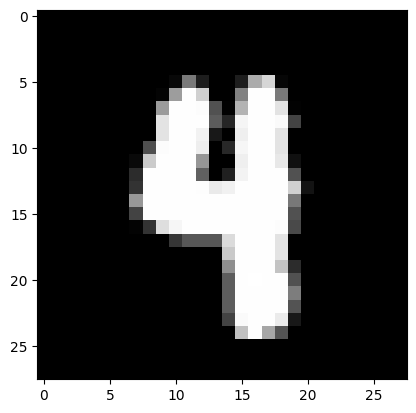

In [13]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

In [14]:
first_layer_size = 32 #Number of neuron units in first layer
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4476 - accuracy: 0.8710
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2111 - accuracy: 0.9381
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1654 - accuracy: 0.9519
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1393 - accuracy: 0.9582
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1204 - accuracy: 0.9643
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1082 - accuracy: 0.9671
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9710
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9748
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9770

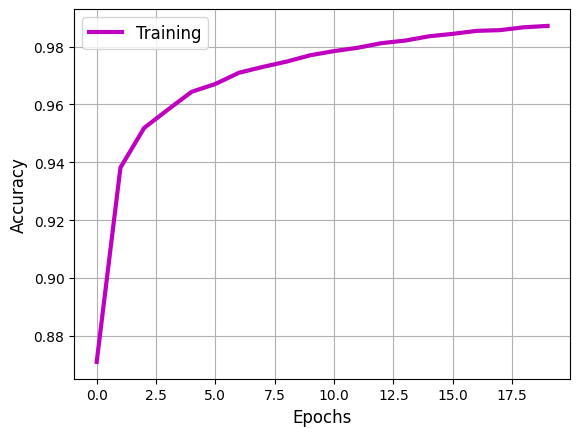

In [17]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['accuracy'],'m-', linewidth=3)

plt.grid(True)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training'], loc='best', fontsize=12)
plt.show()

In [18]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11966554820537567
Test accuracy: 0.9695000052452087


In [19]:
# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 105ms/step
Prediction
 [1.1092498e-14 4.5532314e-14 8.9479184e-16 3.8441101e-08 1.8150745e-15
 1.0000000e+00 3.3663531e-13 9.1094760e-17 3.6868802e-12 6.8882455e-09]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


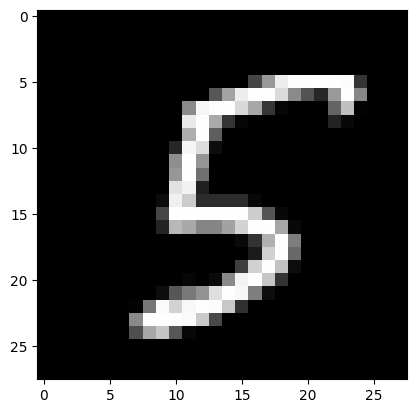

In [20]:
# Write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

(477, 492, 3)


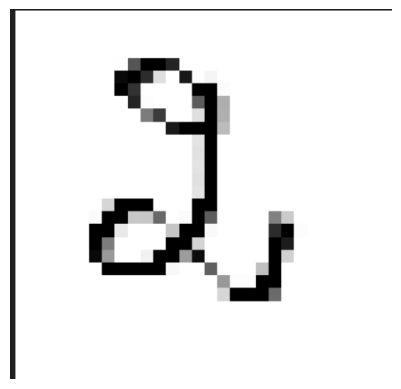

In [35]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/digit2.png', cv2.IMREAD_COLOR)
# cv2_imshow(image_bgr)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_rgb.shape)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

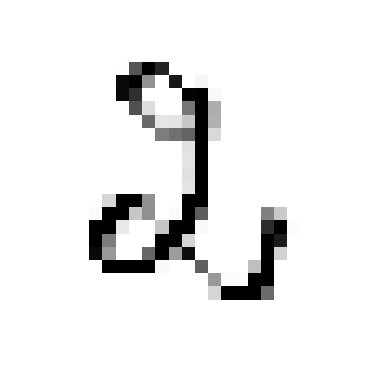

In [36]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/digit2.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [37]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 25ms/step
Prediction Score:
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5
